In [1]:
%load_ext autoreload
%autoreload 2

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

In [289]:
df = pd.read_csv('../../data/data/bbmp-date.csv')

In [290]:
df.columns = [x if x != 'Result declared on' else 'Result Declaration Date' for x in df.columns]
df.columns = [x.title() for x in df.columns]

In [291]:
# Make all - entries NaN and standardise format
date_columns = [x for x in df.columns if 'Date' in x]
for column in date_columns:
    # Replace with NaN
    df.loc[df[column].isna(), column] = '01.01.2000'
    df.loc[df[column] == '-', column] = '01.01.2000'

In [292]:
df.loc[0, 'Release Date']

'03/26/2020'

In [294]:
# Convert to pd.datetime
date_columns = [x for x in df.columns if 'Date' in x]
for column in date_columns:
    if column != 'Release Date':
        df[column] = df[column].apply(lambda x : x.strip())
        df.loc[:, column] = pd.to_datetime(df.loc[:, column], format='%d.%m.%Y', errors='ignore')
    else:
        df.loc[:, column] = pd.to_datetime(df.loc[:, column], errors='ignore')
        df.loc[:, column] = pd.to_datetime(df.loc[:, column], format='%m.%d.%Y', errors='ignore')
    

In [296]:
# Convert to pd.datetime
date_columns = [x for x in df.columns if 'Date' in x]
for column in date_columns:
    try:
        df.loc[df[column].apply(lambda x : x.year) == 2000, column] = np.nan
    except:
        print(df)
    

In [297]:
df

,Sl. No.,State Patient Id,Age,Age Group,Gender,Date Of Travel,Date Of Arrival To India,Date Of Onset Of Symptoms,Date Of Hospitalization,Date Of Sample Collection,Result Declaration Date,Current Status,Status,Release Date
0,1,P1,44,40 to 50,M,2020-02-28,2020-03-01,2020-03-04,2020-03-08,2020-03-05,2020-03-08,Asymtomatic; Sample Negative on 21.03.2020; Di...,Recovered,2020-03-26
1,2,P2,47,40 to 50,F,NaT,NaT,2020-03-08,2020-03-08,2020-03-08,2020-03-09,Second sample NEGATIVE on 19.03.2020 ; Discharged,Recovered,2020-03-23
2,3,P3,13,10 to 20,F,NaT,NaT,2020-03-08,2020-03-08,2020-03-08,2020-03-09,Asymtomatic; Sample Negative on 21.03.2020 ; D...,Recovered,2020-03-26
3,4,P4,50,40 to 50,M,2020-03-08,2020-03-08,2020-03-04,2020-03-09,2020-03-08,2020-03-09,Asymtomatic; Sample Negative on 21.03.2020; Di...,Recovered,2020-03-24
4,5,P5,26,20 to 30,M,2020-03-06,2020-03-06,2020-03-09,2020-03-11,2020-03-10,2020-03-11,Second sample NEGATIVE on 19.03.2020; Discharg...,Recovered,2020-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,64,P54,64,60 to 70,M,NaT,NaT,NaT,NaT,NaT,NaT,Isolated in the hospital,Active,NaT
64,65,P84,13,10 to 20,M,NaT,NaT,NaT,NaT,NaT,NaT,Isolated in the hospital,Active,NaT
65,66,P181,27,20 to 30,F,NaT,2020-04-08,NaT,2020-04-07,NaT,NaT,Isolated in the hospital,Active,NaT
66,67,P189,19,21 to 30,NaN,NaT,NaT,2020-04-08,NaT,NaT,NaT,Isolated in the hospital,Active,NaT


In [317]:
df['Exposed Time'] = np.maximum((df['Date Of Onset Of Symptoms'] - df['Date Of Travel']).astype('timedelta64[D]'), 0)
df['Infectious Time'] = np.maximum((df['Date Of Hospitalization'] - df['Date Of Onset Of Symptoms']).astype('timedelta64[D]'), 0)
df['Hospitalisation Time'] = np.maximum((df['Release Date'] - df['Result Declaration Date']).astype('timedelta64[D]'), 0)

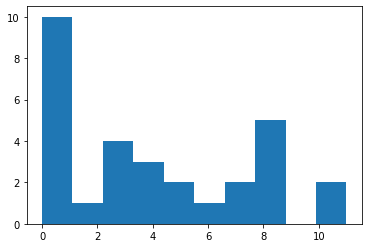

4.066666666666666 3.37573037364591


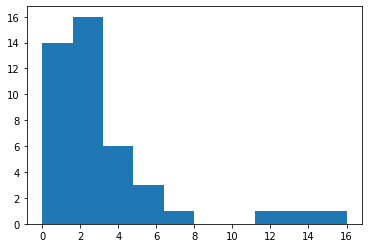

3.0232558139534884 3.4336797814496283


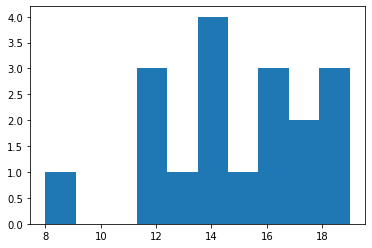

14.777777777777779 2.7397395568751004


In [319]:
plt.hist(df['Exposed Time'])
plt.show()
print(np.mean(df['Exposed Time']), np.std(df['Exposed Time']))
plt.hist(df['Infectious Time'])
plt.show()
print(np.mean(df['Infectious Time']), np.std(df['Infectious Time']))
plt.hist(df['Hospitalisation Time'])
plt.show()
print(np.mean(df['Hospitalisation Time']), np.std(df['Hospitalisation Time']))